<a href="https://colab.research.google.com/github/Quark-hadron/Spaceship-Titanic/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [341]:
! gdown --id 1AleKe4XWU1xDQA_SoGXU9PnOaVn3hATB

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1AleKe4XWU1xDQA_SoGXU9PnOaVn3hATB
To: /content/sample_submission.csv
100% 59.9k/59.9k [00:00<00:00, 59.1MB/s]


In [342]:
! gdown --id 1EiOJsS0J9GQ2CBr4PB9Xf-s3igmDqKhf

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1EiOJsS0J9GQ2CBr4PB9Xf-s3igmDqKhf
To: /content/test.csv
100% 372k/372k [00:00<00:00, 122MB/s]


In [343]:
! gdown --id 19I0xWQjq84VqX9KY2oAFrC06hg6FULOW

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19I0xWQjq84VqX9KY2oAFrC06hg6FULOW
To: /content/train.csv
100% 805k/805k [00:00<00:00, 114MB/s]


In [344]:
#! pip install catboost

In [345]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest, VarianceThreshold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, XGBRegressor, XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
import catboost
from catboost import CatBoost, CatBoostClassifier, CatBoostRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_recall_curve, roc_auc_score, roc_curve, classification_report, r2_score

In [346]:
df_train = pd.read_csv('/content/train.csv')
df_sample = pd.read_csv('/content/sample_submission.csv')
df_test = pd.read_csv('/content/test.csv')

Идентификатор пассажира
 Главная Планета

Каюта
Пункт назначения
Возраст
VIP-зал
Обслуживание
Фуд-корт
Торговый центр
Спа
VRDeck
Имя
Транспортируемый

In [347]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [348]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [349]:
df_sample.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [350]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [351]:
df_train.isna().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [352]:
TF = {True:1, False:0}
df_train['CryoSleep'] = df_train['CryoSleep'].map(TF)
df_train['VIP'] = df_train['VIP'].map(TF)
df_train['Transported'] = df_train['Transported'].map(TF)

In [353]:
TF = {True:1, False:0}
df_test['CryoSleep'] = df_test['CryoSleep'].map(TF)
df_test['VIP'] = df_test['VIP'].map(TF)

In [354]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [355]:
df_train['HomePlanet'].fillna(df_train['HomePlanet'].value_counts().idxmax(), inplace=True)
df_train['CryoSleep'].fillna(df_train['CryoSleep'].value_counts().idxmax(), inplace=True)
df_train['Destination'].fillna(df_train['Destination'].value_counts().idxmax(), inplace=True)
df_train['VIP'].fillna(df_train['VIP'].value_counts().idxmax(), inplace=True)

/tmp/ipython-input-355-410432426.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['HomePlanet'].fillna(df_train['HomePlanet'].value_counts().idxmax(), inplace=True)
/tmp/ipython-input-355-410432426.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [356]:
df_test['CryoSleep'].value_counts()

,count
CryoSleep,
0.0,2640
1.0,1544


In [357]:
df_test['HomePlanet'].fillna(df_test['HomePlanet'].value_counts().idxmax(), inplace=True)
df_test['CryoSleep'].fillna(df_test['CryoSleep'].value_counts().idxmax(), inplace=True)
df_test['Destination'].fillna(df_test['Destination'].value_counts().idxmax(), inplace=True)
df_test['VIP'].fillna(df_test['VIP'].value_counts().idxmax(), inplace=True)

/tmp/ipython-input-357-486646197.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['HomePlanet'].fillna(df_test['HomePlanet'].value_counts().idxmax(), inplace=True)
/tmp/ipython-input-357-486646197.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doin

In [358]:
df_train['Age'].fillna(df_train['Age'].median(),inplace=True)
df_train['Age'] = df_train['Age'].astype('int')

/tmp/ipython-input-358-2504851852.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].median(),inplace=True)


In [359]:
df_test['Age'].fillna(df_test['Age'].median(),inplace=True)
df_test['Age'] = df_test['Age'].astype('int')

/tmp/ipython-input-359-2229306601.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(df_test['Age'].median(),inplace=True)


In [360]:
def pay_services(x):
  if x > 0:
    return 1
  return 0

In [361]:
df_train['RoomService'] = df_train['RoomService'].apply(pay_services)
df_train['FoodCourt'] = df_train['FoodCourt'].apply(pay_services)
df_train['ShoppingMall'] = df_train['ShoppingMall'].apply(pay_services)
df_train['Spa'] = df_train['Spa'].apply(pay_services)
df_train['VRDeck'] = df_train['VRDeck'].apply(pay_services)

In [362]:
df_train['RoomService'].fillna(df_train['RoomService'].value_counts().idxmax(), inplace=True)
df_train['FoodCourt'].fillna(df_train['FoodCourt'].value_counts().idxmax(), inplace=True)
df_train['ShoppingMall'].fillna(df_train['ShoppingMall'].value_counts().idxmax(), inplace=True)
df_train['Spa'].fillna(df_train['Spa'].value_counts().idxmax(), inplace=True)
df_train['VRDeck'].fillna(df_train['VRDeck'].value_counts().idxmax(), inplace=True)
df_train['Name'].fillna(df_train['Name'].value_counts().idxmax(), inplace=True)
df_train['Cabin'].fillna(df_train['Cabin'].value_counts().idxmax(), inplace=True)

/tmp/ipython-input-362-3151711614.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['RoomService'].fillna(df_train['RoomService'].value_counts().idxmax(), inplace=True)
/tmp/ipython-input-362-3151711614.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [363]:
df_test['RoomService'] = df_test['RoomService'].apply(pay_services)
df_test['FoodCourt'] = df_test['FoodCourt'].apply(pay_services)
df_test['ShoppingMall'] = df_test['ShoppingMall'].apply(pay_services)
df_test['Spa'] = df_test['Spa'].apply(pay_services)
df_test['VRDeck'] = df_test['VRDeck'].apply(pay_services)

In [364]:
df_test['RoomService'].fillna(df_test['RoomService'].value_counts().idxmax(), inplace=True)
df_test['FoodCourt'].fillna(df_test['FoodCourt'].value_counts().idxmax(), inplace=True)
df_test['ShoppingMall'].fillna(df_test['ShoppingMall'].value_counts().idxmax(), inplace=True)
df_test['Spa'].fillna(df_test['Spa'].value_counts().idxmax(), inplace=True)
df_test['VRDeck'].fillna(df_test['VRDeck'].value_counts().idxmax(), inplace=True)
df_test['Name'].fillna(df_test['Name'].value_counts().idxmax(), inplace=True)
df_test['Cabin'].fillna(df_test['Cabin'].value_counts().idxmax(), inplace=True)

/tmp/ipython-input-364-4207451363.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['RoomService'].fillna(df_test['RoomService'].value_counts().idxmax(), inplace=True)
/tmp/ipython-input-364-4207451363.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [365]:
df_train['Name'].value_counts(dropna=False)

,count
Name,
Ankalik Nateansive,202
Glena Hahnstonsen,2
Troya Schwardson,2
Asch Stradick,2
Loree Wolfernan,2
...,...
Backse Cla,1
Fres Cla,1
Dous Blane,1


In [366]:
df_train['CryoSleep'] = df_train['CryoSleep'].astype('int8')
df_train['VIP'] = df_train['VIP'].astype('int8')

In [367]:
df_test['CryoSleep'] = df_test['CryoSleep'].astype('int8')
df_test['VIP'] = df_test['VIP'].astype('int8')

In [368]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39,0,0,0,0,0,0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24,0,1,1,1,1,1,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58,1,1,1,0,1,1,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33,0,0,1,1,1,1,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16,0,1,1,1,1,1,Willy Santantines,1


In [369]:
df_train.isna().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


In [370]:
df_train['Cabin'].value_counts()

,count
Cabin,
G/734/S,207
D/176/S,7
B/201/P,7
G/109/P,7
F/1194/P,7
...,...
G/0/S,1
F/3/S,1
F/1/P,1


In [371]:
df_train['Cabin'] = df_train['Cabin'].astype('str')

In [372]:
df_test['Cabin'] = df_test['Cabin'].astype('str')

In [373]:
def deck(i):
  deck_num_side = i.split(sep='/')
  return f'Deck_{deck_num_side[0]}'

def num(i):
  deck_num_side = i.split(sep='/')
  return deck_num_side[1]

def side(i):
  deck_num_side = i.split(sep='/')
  return f'Side_{deck_num_side[2]}'


In [374]:
df_train['Deck'] = df_train['Cabin'].apply(deck)
df_train['Num_cabin'] = df_train['Cabin'].apply(num)
df_train['Side'] = df_train['Cabin'].apply(side)

In [375]:
df_test['Deck'] = df_test['Cabin'].apply(deck)
df_test['Num_cabin'] = df_test['Cabin'].apply(num)
df_test['Side'] = df_test['Cabin'].apply(side)

In [376]:
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

In [377]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num_cabin,Side
0,0001_01,Europa,0,TRAPPIST-1e,39,0,0,0,0,0,0,Maham Ofracculy,0,Deck_B,0,Side_P
1,0002_01,Earth,0,TRAPPIST-1e,24,0,1,1,1,1,1,Juanna Vines,1,Deck_F,0,Side_S
2,0003_01,Europa,0,TRAPPIST-1e,58,1,1,1,0,1,1,Altark Susent,0,Deck_A,0,Side_S
3,0003_02,Europa,0,TRAPPIST-1e,33,0,0,1,1,1,1,Solam Susent,0,Deck_A,0,Side_S
4,0004_01,Earth,0,TRAPPIST-1e,16,0,1,1,1,1,1,Willy Santantines,1,Deck_F,1,Side_S


In [378]:
df_train['PassengerId'].value_counts()

,count
PassengerId,
9280_02,1
0001_01,1
0002_01,1
0003_01,1
0003_02,1
...,...
0008_01,1
0007_01,1
0006_02,1


In [379]:
def Pid(x):
  id = x.split(sep='_')[0]
  count = x.split(sep='_')[1]
  num = count.split(sep='0')[1]
  return int(num)

In [380]:
df_train['Passenger_count'] = df_train['PassengerId'].apply(Pid)
df_test['Passenger_count'] = df_test['PassengerId'].apply(Pid)

In [381]:
df_train.drop('PassengerId', axis=1, inplace=True)
id = df_test['PassengerId'].copy()
df_test.drop('PassengerId', axis=1, inplace=True)

In [382]:
df_train['Name'].value_counts()

,count
Name,
Ankalik Nateansive,202
Glena Hahnstonsen,2
Troya Schwardson,2
Asch Stradick,2
Loree Wolfernan,2
...,...
Backse Cla,1
Fres Cla,1
Dous Blane,1


In [383]:
def family(x):
  surname_ = pd.Series([i.split(sep=' ')[-1] for i in x])
  surname_count = surname_.value_counts().values
  for i in surname_count:
    if i > 1:
      return 1
    else:
      return 0

In [384]:
df_train['Family'] = df_train['Name'].apply(family)
df_test['Family'] = df_test['Name'].apply(family)

In [385]:
df_train['Family'].value_counts()

,count
Family,
1,8265
0,428


In [386]:
df_train.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)

In [387]:
df_train['Transported'].value_counts(normalize=True)

,proportion
Transported,
1,0.503624
0,0.496376


<Axes: xlabel='Transported', ylabel='count'>

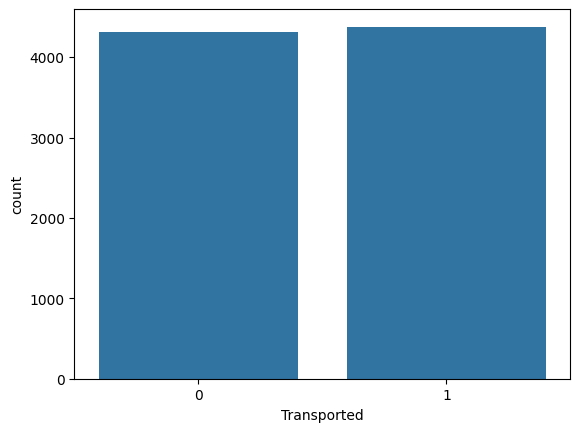

In [388]:
sns.barplot(df_train['Transported'].value_counts())

In [389]:
df_hp = pd.get_dummies(df_train['HomePlanet']).astype('int')

In [390]:
df_train = pd.concat([df_train, df_hp], axis=1)

In [391]:
df_train.drop('HomePlanet', axis=1, inplace=True)

In [392]:
df_train['Destination'].value_counts().keys()

Index(['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22'], dtype='object', name='Destination')

In [393]:
df_hp = pd.get_dummies(df_test['HomePlanet']).astype('int')

In [394]:
df_test = pd.concat([df_test, df_hp], axis=1)

In [395]:
df_test.drop('HomePlanet', axis=1, inplace=True)

In [396]:
df_test['Destination'].value_counts().keys()

Index(['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22'], dtype='object', name='Destination')

In [397]:
destination = {

    'TRAPPIST-1e' : 'TRAPPIST',
    '55 Cancri e' : 'Cancri',
    'PSO J318.5-22' : 'PSO'

      }

In [398]:
df_train['Destination'] = df_train['Destination'].map(destination)

In [399]:
df_D = pd.get_dummies(df_train["Destination"]).astype('int')

In [400]:
df_train = pd.concat([df_train, df_D], axis=1)

In [401]:
df_train.drop('Destination', axis=1, inplace=True)

In [402]:
df_train.drop('Num_cabin', axis=1, inplace=True)

In [403]:
df_deck = pd.get_dummies(df_train['Deck']).astype('int')

In [404]:
df_train = pd.concat([df_train, df_deck], axis=1)

In [405]:
df_train.drop('Deck', axis=1, inplace=True)

In [406]:
df_side = pd.get_dummies(df_train['Side']).astype('int')

In [407]:
df_train = pd.concat([df_train, df_side], axis=1)

In [408]:
df_train.drop('Side', axis=1, inplace=True)

In [409]:
df_test['Destination'] = df_test['Destination'].map(destination)

In [410]:
dft_D = pd.get_dummies(df_test["Destination"]).astype('int')

In [411]:
df_test = pd.concat([df_test, dft_D], axis=1)

In [412]:
df_test.drop('Destination', axis=1, inplace=True)

In [413]:
df_test.drop('Num_cabin', axis=1, inplace=True)

In [414]:
dft_deck = pd.get_dummies(df_test['Deck']).astype('int')

In [415]:
df_test = pd.concat([df_test, dft_deck], axis=1)

In [416]:
df_test.drop('Deck', axis=1, inplace=True)

In [417]:
dft_side = pd.get_dummies(df_test['Side']).astype('int')

In [418]:
df_test = pd.concat([df_test, dft_side], axis=1)

In [419]:
df_test.drop('Side', axis=1, inplace=True)

In [420]:
df_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Passenger_count,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0,39,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,0,24,0,1,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,58,1,1,1,0,1,1,0,1,...,1,0,0,0,0,0,0,0,0,1
3,0,33,0,0,1,1,1,1,0,2,...,1,0,0,0,0,0,0,0,0,1
4,0,16,0,1,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,1


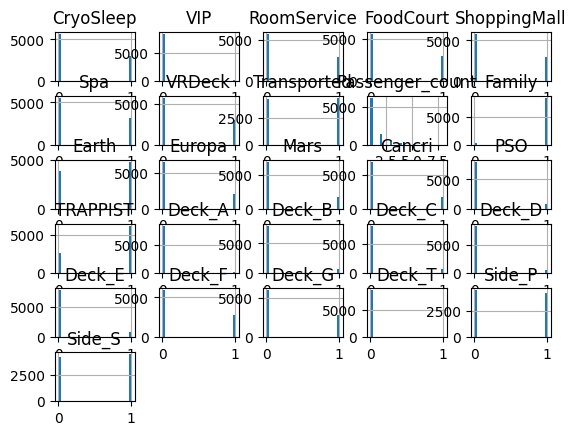

In [421]:
df_train.drop('Age', axis=1).hist(bins=30);

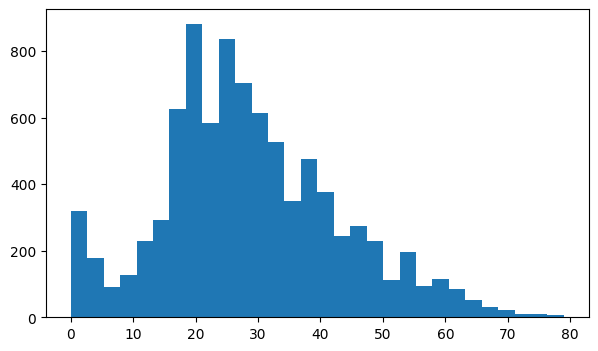

In [422]:
plt.figure(figsize=(7,4))
plt.hist(df_train['Age'], bins=30);
plt.show()

In [423]:
df_train.describe().loc[['mean', 'std', 'min', 'max']][['Age', 'Passenger_count']]

,Age,Passenger_count
mean,28.790291,1.517773
std,14.341404,1.054241
min,0.000000,1.000000
max,79.000000,8.000000


In [424]:
X = df_train.drop('Transported', axis=1)
y = df_train['Transported']

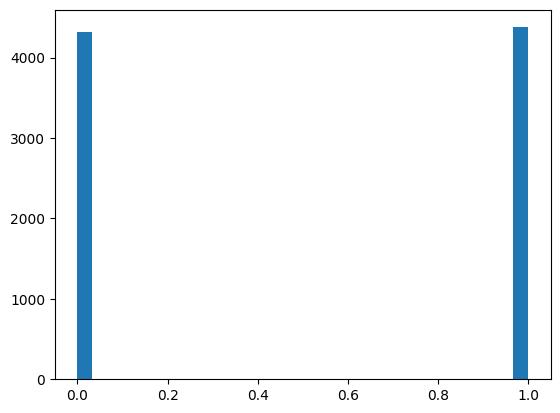

In [425]:
plt.hist(y, bins=30);

In [426]:
stats, p_value = shapiro(y)

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8693.
  res = hypotest_fun_out(*samples, **kwds)


In [427]:
p_value = round(p_value, 2)

In [428]:
if p_value < 0.05:
    print("Данные нормальны (не отвергаем H0)")
else:
    print("Данные не нормальны (отвергаем H0)")

Данные нормальны (не отвергаем H0)


In [429]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X,y)

SelectKBest(k='all')

In [430]:
rate = pd.DataFrame(fs.scores_, X.columns, columns=['score'])
rate = rate.sort_values('score', axis=0,  ascending=False)

<Axes: >

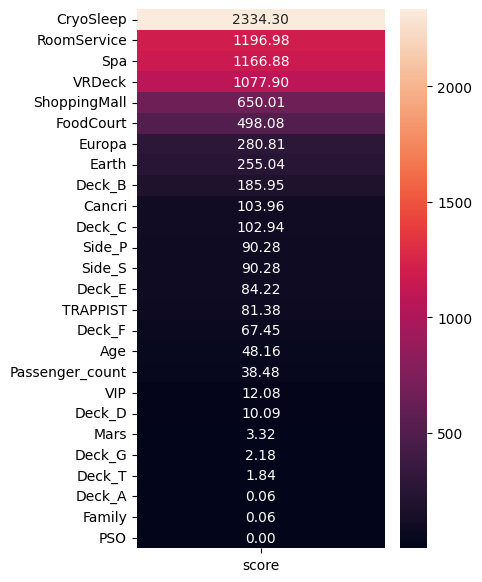

In [431]:
plt.figure(figsize=(4, 7))
sns.heatmap(rate, annot=True, fmt='.2f')

In [432]:
#sns.pairplot(X)

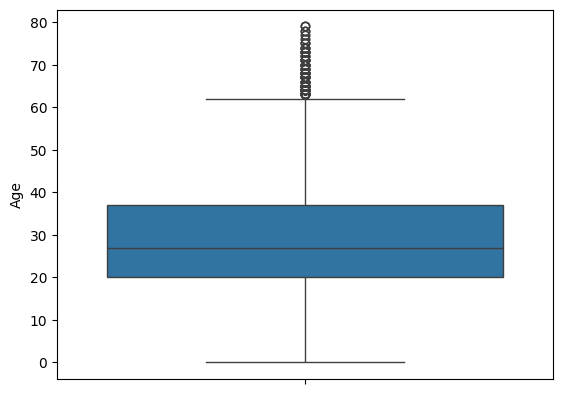

In [433]:
sns.boxplot(df_train['Age']);

In [434]:
sum(df_train['Age'].values == 0)

np.int64(178)

In [435]:
df_train.drop(['Side_P','Deck_T'], axis=1, inplace=True)

In [436]:
df_test.drop(['Side_P','Deck_T'], axis=1, inplace=True)

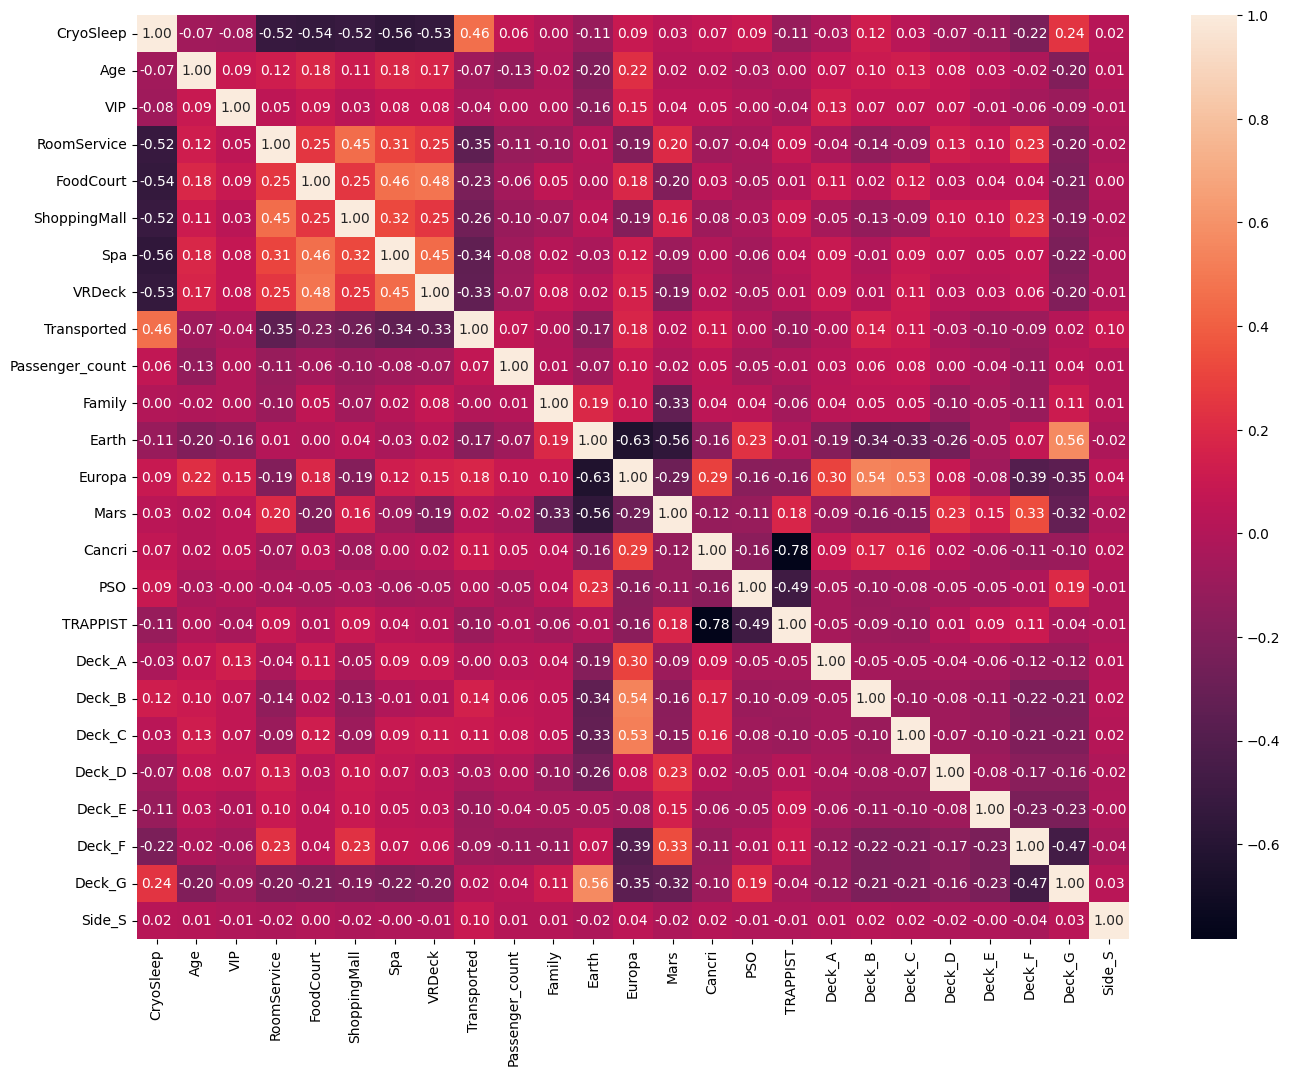

In [437]:
plt.figure(figsize=(16,12))
sns.heatmap(df_train.corr(), fmt='.2f', annot=True);

In [438]:
columns = [i for i in df_train]

In [439]:
df_var = np.var(df_train[columns].drop('Transported', axis=1))

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:4006: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [440]:
df_var.sort_values(ascending=False)

,0
Age,205.652214
Passenger_count,1.111297
Side_S,0.249739
Earth,0.247242
Spa,0.232178
FoodCourt,0.227893
CryoSleep,0.227308
VRDeck,0.226363
RoomService,0.223635
ShoppingMall,0.222235


In [441]:
X = df_train.drop('Transported', axis=1)
y = df_train['Transported']

In [442]:
mms = MinMaxScaler()

In [443]:
X = mms.fit_transform(X)

In [444]:
X_t = mms.fit_transform(df_test)

In [445]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100, shuffle=True, stratify=y)

In [446]:
models = {
    'LogisticRegression':LogisticRegression(n_jobs=-1),
    'LogisticRegressionCV':LogisticRegressionCV(n_jobs=-1),
    'SVC':SVC(),
    'DummyClassifier':DummyClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'RandomForestClassifier':RandomForestClassifier(n_jobs=-1),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier(n_jobs=-1),
    'XGBRFClassifier':XGBRFClassifier(n_jobs=-1),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'GaussianProcessClassifier':GaussianProcessClassifier(),
    'GaussianNB':GaussianNB(),
    'XGBClassifier':XGBClassifier(n_jobs=-1),
    'LGBMClassifier':LGBMClassifier(n_jobs=-1),
}

best_score = 0
best_model = None

In [447]:
for name_model, model in models.items():
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  acs = accuracy_score(y_test, y_pred)

  print(f'{name_model}:    {acs}')

  if acs > best_score:
    best_score = acs
    best_model = model
    best_name_model = name_model

print(f'best model: {best_name_model} ----> {best_score}')

LogisticRegression:    0.7511499540018399
LogisticRegressionCV:    0.750229990800368
SVC:    0.765869365225391
DummyClassifier:    0.5036798528058878
GradientBoostingClassifier:    0.7598896044158233
RandomForestClassifier:    0.7051517939282429
DecisionTreeClassifier:    0.6770929162833487
KNeighborsClassifier:    0.7244710211591536
XGBRFClassifier:    0.7585096596136155
AdaBoostClassifier:    0.7456301747930083
GaussianProcessClassifier:    0.7631094756209752
GaussianNB:    0.7327506899724011
XGBClassifier:    0.7364305427782889
[LightGBM] [Info] Number of positive: 3283, number of negative: 3236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 6519, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [448]:
y_pred = best_model.predict(x_test)

In [449]:
result = best_model.predict(X_t)

In [450]:
accuracy_score(y_test, y_pred)

0.765869365225391

In [451]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78      1079
           1       0.80      0.71      0.75      1095

    accuracy                           0.77      2174
   macro avg       0.77      0.77      0.77      2174
weighted avg       0.77      0.77      0.77      2174



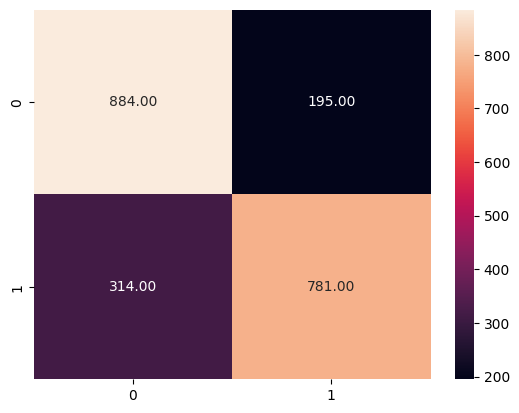

In [452]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f');

In [453]:
y_pred = best_model.predict(x_train)

In [454]:
accuracy_score(y_train, y_pred)

0.7608528915477833

In [455]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77      3236
           1       0.80      0.70      0.75      3283

    accuracy                           0.76      6519
   macro avg       0.76      0.76      0.76      6519
weighted avg       0.76      0.76      0.76      6519



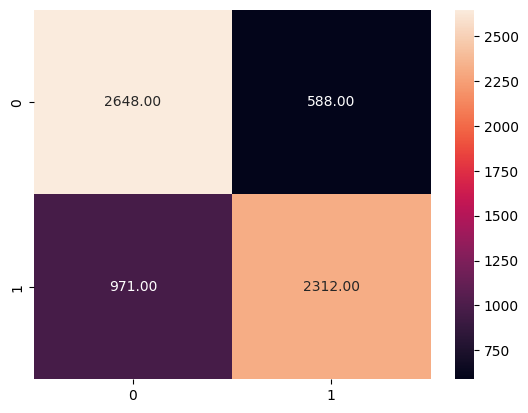

In [456]:
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='.2f');

In [457]:
feature_name = [i for i in df_train.drop('Transported', axis=1).columns]

In [458]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [459]:
importances = rfc.feature_importances_

In [460]:
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

In [461]:
feature_impotances = pd.Series(data=importances, index=feature_name)

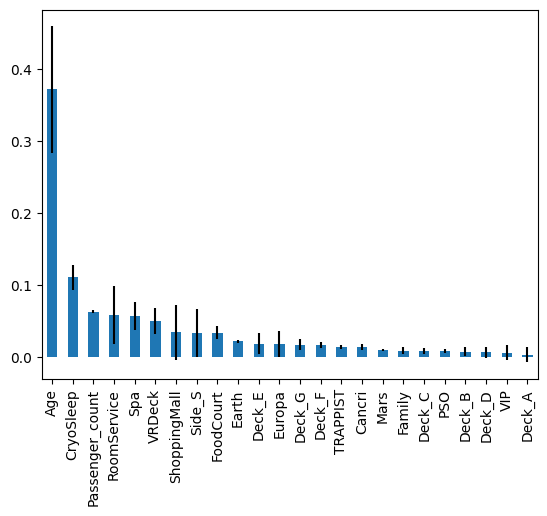

In [462]:
feature_impotances.sort_values(ascending=False).plot.bar(yerr=std);

In [463]:
gbc = GradientBoostingClassifier()

In [464]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [465]:
y_prob = gbc.predict_proba(x_test)[:,1]

In [466]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
score = roc_auc_score(y_test, y_prob)

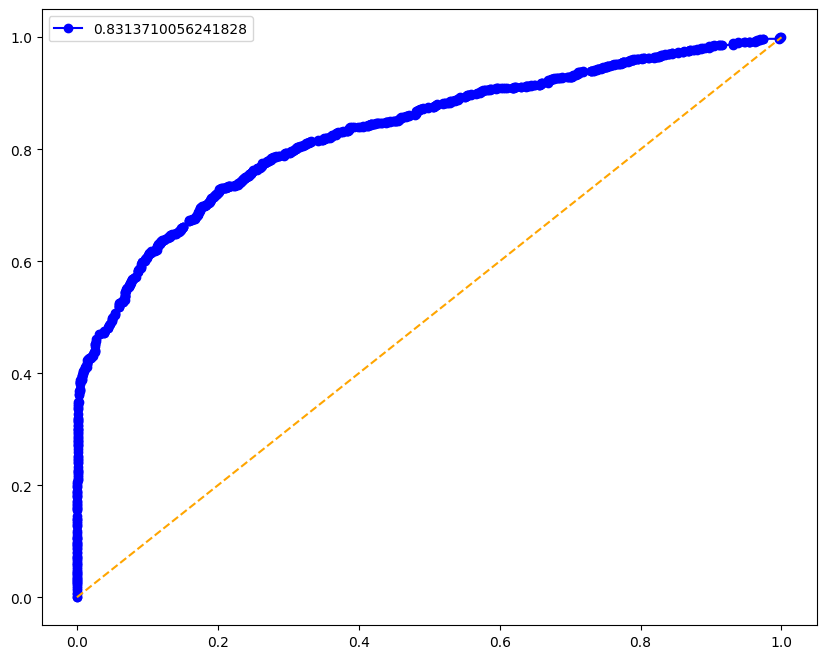

In [467]:
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, marker='o', c='blue',label=score)
plt.plot([0,1],[0,1], linestyle='--', c='orange')
plt.legend()
plt.show()

In [468]:
y_prob = gbc.predict_proba(x_train)[:,1]

In [469]:
fpr, tpr, _ = roc_curve(y_train, y_prob)
score = roc_auc_score(y_train, y_prob)

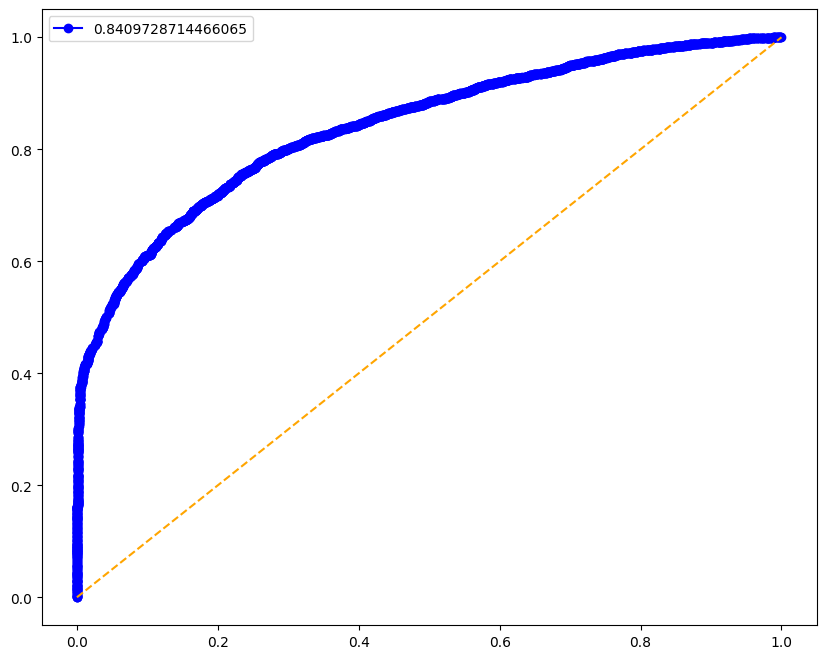

In [470]:
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, marker='o', c='blue',label=score)
plt.plot([0,1],[0,1], linestyle='--', c='orange')
plt.legend()
plt.show()

In [471]:
result

array([1, 0, 1, ..., 1, 0, 1])

In [472]:
df_sample

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [475]:
df_test.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Passenger_count,Family,...,PSO,TRAPPIST,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Side_S
0,1,27,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,1
1,0,19,0,0,1,0,1,0,1,1,...,0,1,0,0,0,0,0,1,0,1
2,1,31,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
3,0,38,0,0,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,0,1
4,0,20,0,1,0,1,0,0,1,1,...,0,1,0,0,0,0,0,1,0,1


In [474]:
output = pd.DataFrame({'PassengerId': id,
                       'Transported': result.astype(bool)})

output.to_csv('submission.csv', index=False)